# Birthday Paradox
## Carlos Hinrichsen
### May 28th, 2019

Birthday paradox concerns the probability that, in a set of `n` randomly chosen people, some pair of them will have the same birthday. You can read about this problem at https://en.wikipedia.org/wiki/Birthday_problem.

Write a function called **`has_duplicates()`**, that takes a list and returns `True` if there is any element that appears more than once. It should not modify the original list.

If there are 45 students in the class, what are the chances that any two students will have the same birthday? You can estimate this probability by generating random samples of 45 birthdays and checking for matches.

__IMPORTANT NOTE: PLEASE REVIEW THE "SECTION 5. APPENDIX" BEFORE RUNNING THE WHOLE NOTEBOOK__ 

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

## 2. Creating **`has_duplicates()`** function

The purpose of that function is to take a list and returns `True` if there is any element that appears more than once. It should not modify the original list. 

__IMPORTANT: In the next section it will be created the function that simulates different samples of students classes, and that prints:__
- __number of students__
- __number of iterations/samples__
- __list of duplicate days for each iteration, where duplicates are found__
- __probability__

In [2]:
# Defining the function
def has_duplicates(mylist):
    # We created a global variable to use in the simulation part of the assignment
    global match
    # Here we identify the number of repeated elements on the list
    match=set([x for x in mylist if mylist.count(x) > 1]);
    # If the number of repeated elements is more than one, we have at least two persons with the same birthday (or match)
    if len(match)>0:
        # We return True in this case, as required by assignment
        return(True)
    # The opposite case
    else:
        # We return False if there is no match
        return(False)

## 3. Test **`has_duplicates()`** function

The main funtionality for the function at this point, is to to take a list and returns `True` if there is any element that appears more than once. It should not modify the original list. 

Below there are three examples of lists of the birthdays of the students, where we will use the **`has_duplicates()`** function:
    1. 7 students with no common birthdays
    2. 7 students where some of them have common birthdays
    3. List of 45 students with birthdays selected randomly from 365 of a year
    
__In the next section we will get more information about the duplicate values, for example, which are the common birthday days__


In [3]:
list_sample1 = [1,2,3,4,6,7,9]
has_duplicates(list_sample1)

False

In [4]:
list_sample2 = [1,2,2,3,4,4,6,7,7,9]
has_duplicates(list_sample2)

True

In [5]:
list_sample3 = list(np.random.choice(np.arange(1,365+1,dtype=int),45,replace=True))
# We print the list to see if there are duplicate values
print(list_sample3)
has_duplicates(list_sample3)

[346, 197, 364, 326, 104, 266, 307, 135, 67, 232, 56, 268, 207, 247, 365, 7, 297, 118, 220, 321, 316, 138, 360, 194, 221, 1, 205, 269, 300, 62, 353, 347, 80, 338, 344, 244, 344, 309, 130, 262, 205, 322, 103, 288, 301]


True

## 4. Creation of samples and simulation

The main purpose of this section is create a code using the **`has_duplicates()`** function, but considering multiple classes within the school (__this is the number of iterations__). The code should print out: 

- number of students
- number of iterations/samples
- list of duplicate days for each iteration, where duplicates are found
- probability

The number of iterations/samples used were 200. This number was determined due to the convergence analysis developed in the section 5. Appendix. 

In [6]:
# Set the initial seed for reproducibility
np.random.seed(1234)
# First we initialize the variables and constants to use
# Number of classes in the school
classes=200
# Number of students per class
std_per_class = 45
# Days of the year where the students have birthdays. In this case is the whole year
days_year = 365
# Counter to calculate the probability
count=0
# Start the simulation of the classes
for i in range(classes):
    # For each class, we create a list of the birthday days of students 
    a_l = list(np.random.choice(np.arange(1,days_year+1,dtype=int),std_per_class,replace=True))
    # We call the has_duplicates function
    has_duplicates(a_l)
    # match is the number of the duplicated birthdays, which is a global variable in the has_duplicates function
    # If the numbers of matches is higher than 0, proceed
    if len(match)>0:
        # We count the number of times where there is a match of birthdays
        count = count +1
        print('In the class(iteration)',i+1,', the list of duplicated birthdays is:',sorted(match))
    # The opposite case
    else:
        # If there is no match, the counter remains the same
        count=count
# Here print(count/classes)
print('The number of students per class is ',std_per_class)
print('The number of iterations is ',classes)
print('Probability =',count/classes*100, "%")

In the class(iteration) 1 , the list of duplicated birthdays is: [108, 234, 337]
In the class(iteration) 2 , the list of duplicated birthdays is: [250]
In the class(iteration) 4 , the list of duplicated birthdays is: [99, 212, 344, 353]
In the class(iteration) 5 , the list of duplicated birthdays is: [210, 317]
In the class(iteration) 6 , the list of duplicated birthdays is: [2, 54, 274]
In the class(iteration) 7 , the list of duplicated birthdays is: [81]
In the class(iteration) 8 , the list of duplicated birthdays is: [365]
In the class(iteration) 9 , the list of duplicated birthdays is: [64]
In the class(iteration) 10 , the list of duplicated birthdays is: [54, 75]
In the class(iteration) 11 , the list of duplicated birthdays is: [218, 234, 285]
In the class(iteration) 12 , the list of duplicated birthdays is: [145, 262]
In the class(iteration) 13 , the list of duplicated birthdays is: [80, 114, 118, 183, 237, 250]
In the class(iteration) 15 , the list of duplicated birthdays is: [1

Now, considering an analytical perspective, and according to the birthday problem ilustrated in https://en.wikipedia.org/wiki/Birthday_problem, the probability that at least two people have birthday the same day is: 

In [7]:
p1 = 1-(math.factorial(days_year))/(pow(days_year,std_per_class)*math.factorial(days_year-std_per_class))
print('Probability =',p1*100, "%")

Probability = 94.0975899465775 %


If the number of iterations is low, the computed probabilities shown above could be different. This is basically because of the convergence of the probability in a simulation environment.

In the following section a convergence analysis will be performed, and graphically it will be easier to see how the probability using simulation converges to the analytical probability when the number of iterations increments.

## 5. Appendix - Convergence Analysis

The idea is to understand how the computed probability using simulation tends to the analytical probability when we increment the number of iterations.

Below, a plot is performed to ilustrate the analysis.

__Warning: This process could take several minutes, due to different simulations will be performed__

Text(1082.1222843856413, 94.0975899465775, 'Analytical Probability: 94.1')

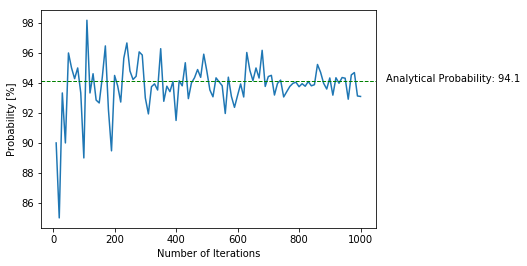

In [8]:
# The comments of the code are similar than those in the section 4, therefore no comments are shown in the code 
np.random.seed(1234)
it = 100
prob1 = []
iters = []
for j in range(it):
    count = 0
    Counting = 0
    iterations = (j+1)*10
    for i in range(iterations):
            a_l = list(np.random.choice(np.arange(1,days_year+1,dtype=int),std_per_class,replace=True))
            has_duplicates(a_l)
            if len(match)>0:
                count = count +1
            else:
                count=count
           
    Counting = [count/iterations*100]
    prob1=prob1+Counting 
    iters = iters + [iterations]
# Here we plot the probabilities by iteration. Additionally, the analytical probability is plotted
plt.xlabel('Number of Iterations')
plt.ylabel('Probability [%]')
#plt.xticks(np.arange(min(iters), max(iters), 100))
plt.plot(iters,prob1)
plt.axhline(p1*100, color='green', linestyle='dashed', linewidth=1)
plt.text(p1*1150, p1*100,'Analytical Probability: {:.1f}'.format(p1*100))

Therefore, looking the plot it is easy to see how the probability by each number of iterations converges to the analytical probability.

To get the number of iterations to use, we need first to understand how the outcome (Probability) changes when the number of iteration increments. The increments will be measured according the following expression:

$$
Prob(i+10)/Prob(i)-1, i\in (10,20,30,...,1000) \ iterations
$$


Text(0, 0.5, 'Percentual Difference of Probability [%]')

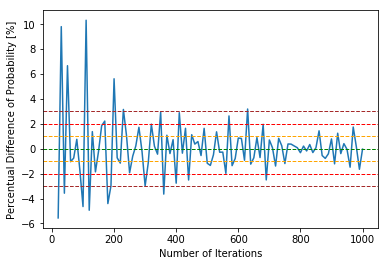

In [9]:
diff = []
for j in range(len(prob1)-1):
    diff = diff +[(prob1[j+1]/prob1[j]-1)*100]
plt.plot(iters[1:100],diff)
plt.axhline(0, color='green', linestyle='dashed', linewidth=1)
plt.axhline(1, color='orange', linestyle='dashed', linewidth=1)
plt.axhline(2, color='red', linestyle='dashed', linewidth=1)
plt.axhline(-1, color='orange', linestyle='dashed', linewidth=1)
plt.axhline(-2, color='red', linestyle='dashed', linewidth=1)
plt.axhline(3, color='brown', linestyle='dashed', linewidth=1)
plt.axhline(-3, color='brown', linestyle='dashed', linewidth=1)
plt.xlabel('Number of Iterations')
plt.ylabel('Percentual Difference of Probability [%]')

Looking the graph, it's easy to see how the percentual difference of the probability tends to 0 once the number of iterations increments. Also, the graph shows different horizontal lines, corresponding to the differences of $\pm$3%, $\pm$2% and $\pm$1%. 

__For this assignment, we will tolerate a a difference of $\pm$3%, therefore, we will choose 200 iterations__  